In [276]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [277]:
data = pd.read_csv('dados_tratados.csv', sep='\t', encoding='utf-8')

In [278]:
data = data.drop('Unnamed: 0',axis=1)

In [279]:
data['Diagnóstico de TOC'].value_counts()

Diagnóstico de TOC
1.0    3741
2.0    1164
Name: count, dtype: int64

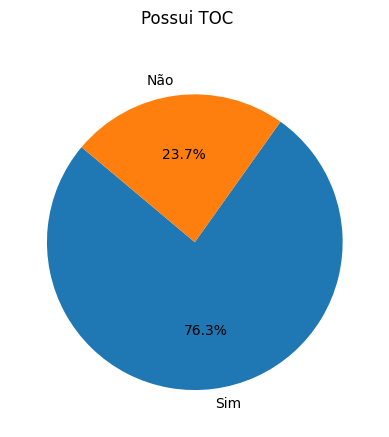

In [280]:
plt.pie(data['Diagnóstico de TOC'].value_counts(), labels=['Sim', 'Não'], autopct='%1.1f%%', startangle=140)
plt.suptitle('Possui TOC')
plt.show()

#### Verificando correlação dos dados

In [281]:
correlation_matrix = data.corr()

In [282]:
correlation_matrix['Diagnóstico de TOC']

UF                                            -0.033886
Situação Censitária                            0.006475
Acesso à Internet                              0.059185
Sexo                                          -0.055735
Idade                                          0.005063
Cor/Raça                                      -0.006100
Sabe Ler/Escrever                              0.045430
Curso Mais Elevado                            -0.023402
Possuí Plano de Saúde                          0.047991
Autoavaliação da Saúde                         0.073874
Diagnóstico de Hipertensão                     0.023882
Diagnóstico de Diabetes                       -0.025437
Diagnóstico de Colesterol Alto                 0.043670
Diagnóstico de AVC                            -0.027359
Diagnóstico de Asma                            0.017095
Diagnóstico de Artrite/Reumatismo              0.022542
Diagnóstico de DORT                            0.014512
Diagnóstico de Outra Doença Mental            -0

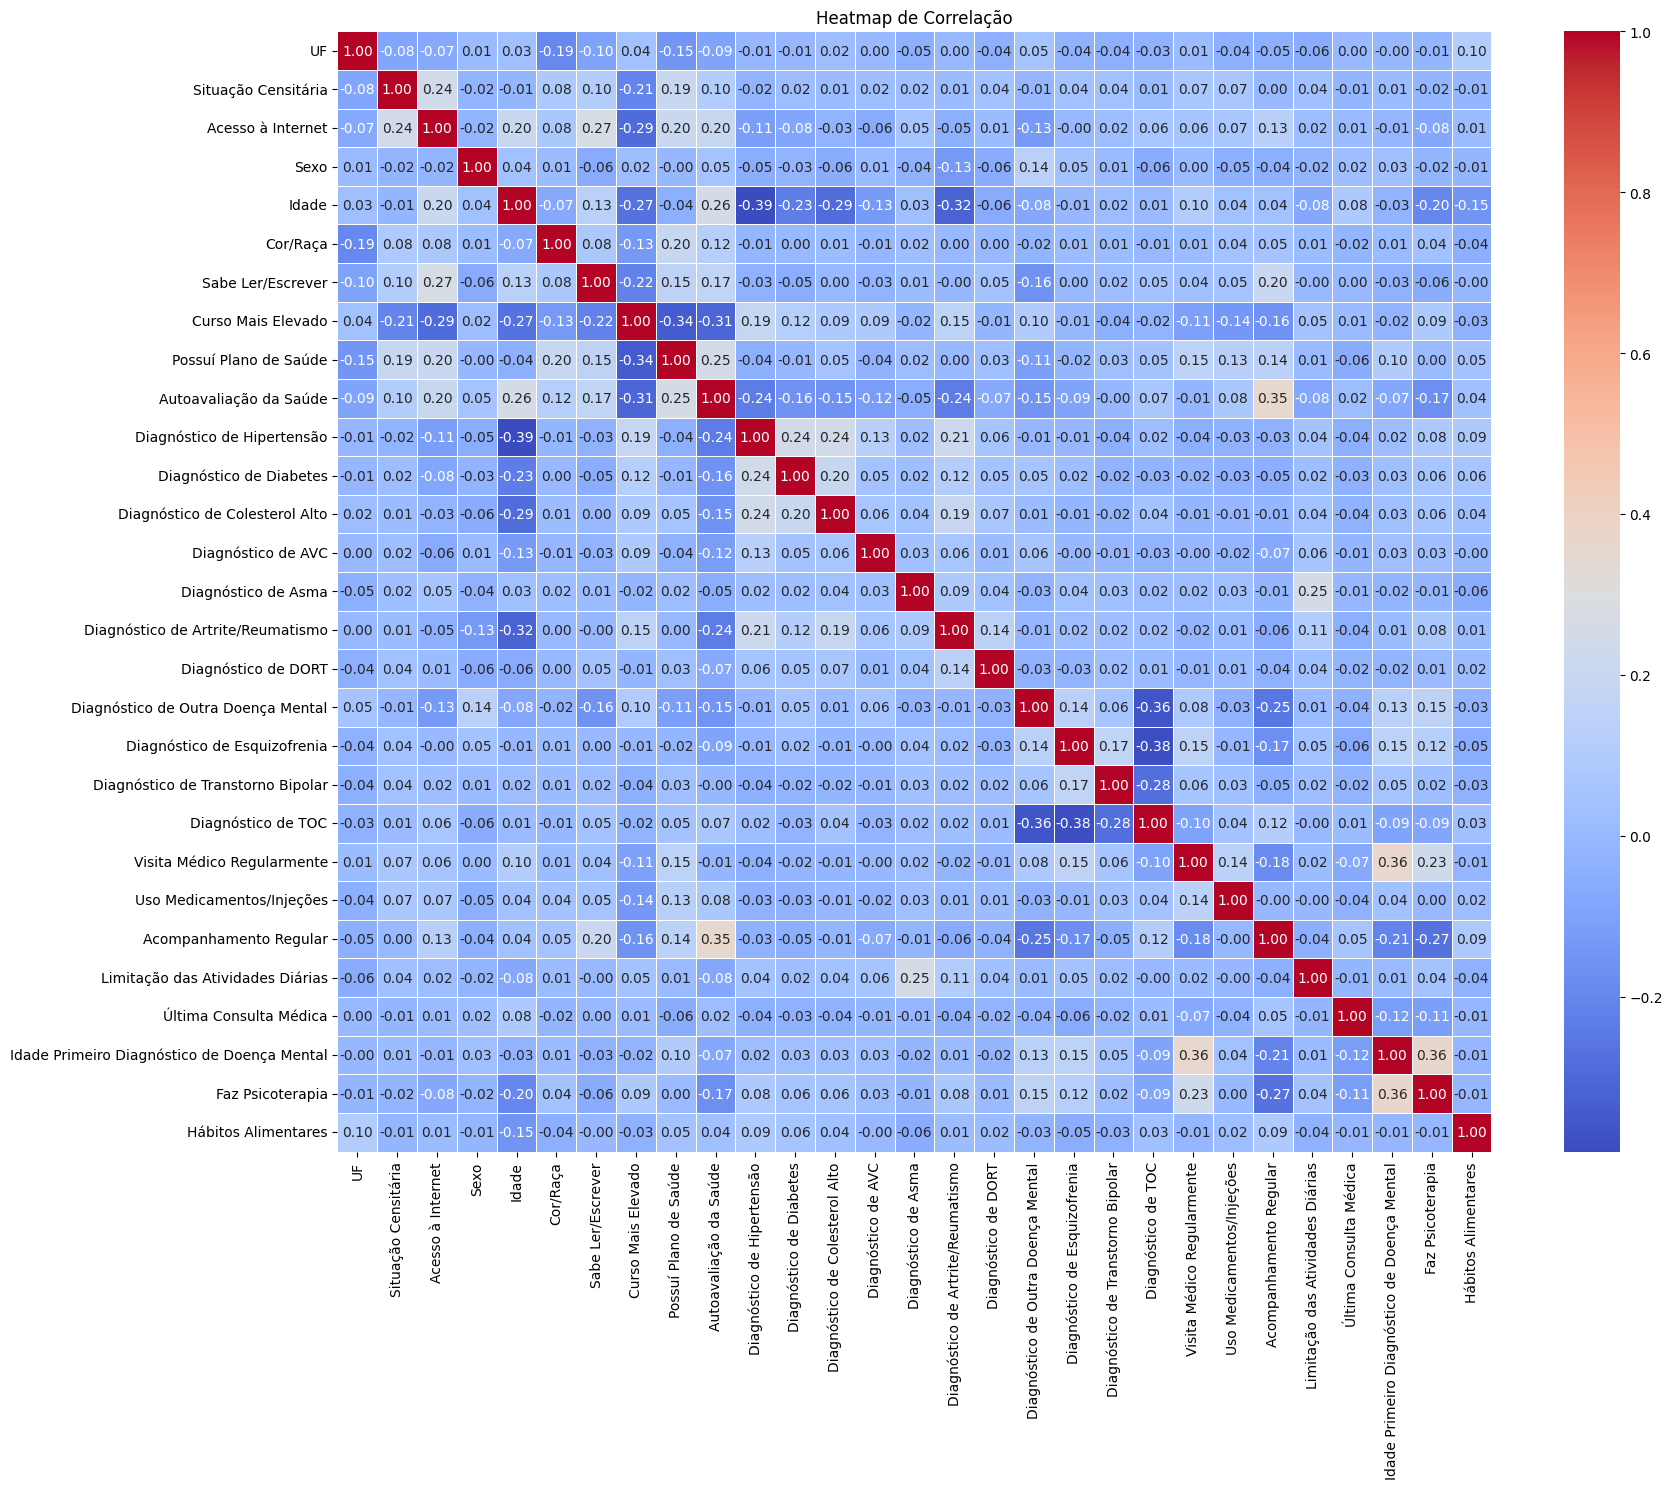

<Figure size 640x480 with 0 Axes>

In [283]:
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlação')
plt.tight_layout()
plt.show()
plt.savefig('correlation_heatmap_large.png') 

In [284]:
correlation = data.corr(numeric_only=True)
print(correlation)

                                                   UF  Situação Censitária  \
UF                                           1.000000            -0.083943   
Situação Censitária                         -0.083943             1.000000   
Acesso à Internet                           -0.068279             0.243154   
Sexo                                         0.006775            -0.019622   
Idade                                        0.030433            -0.012863   
Cor/Raça                                    -0.192164             0.083465   
Sabe Ler/Escrever                           -0.095580             0.103998   
Curso Mais Elevado                           0.042386            -0.206536   
Possuí Plano de Saúde                       -0.147538             0.194971   
Autoavaliação da Saúde                      -0.090161             0.104548   
Diagnóstico de Hipertensão                  -0.011377            -0.024340   
Diagnóstico de Diabetes                     -0.011437           